In [ ]:
# Cleaning

import pandas as pd


data = pd.read_csv('/Healthcare Providers.csv')

# Columns for processing
numerical_cols = ['Number of Services', 'Number of Medicare Beneficiaries',
                  'Number of Distinct Medicare Beneficiary/Per Day Services',
                  'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
                  'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']

categorical_cols = ['Gender of the Provider', 'Entity Type of the Provider', 'HCPCS Drug Indicator',
                    'Country Code of the Provider', 'Medicare Participation Indicator', 'HCPCS Code', 'Place of Service']

columns_to_drop = ['index', 'National Provider Identifier', 'Last Name/Organization Name of the Provider', 'First Name of the Provider',
       'Middle Initial of the Provider', 'Credentials of the Provider', 'Street Address 1 of the Provider', 'Street Address 2 of the Provider',
       'City of the Provider', 'Zip Code of the Provider', 'State Code of the Provider', 'Provider Type', 'HCPCS Description', 'HCPCS Code']

drop_col = data.drop(columns=columns_to_drop, errors='ignore', inplace=True)


null_values = data.isnull().sum()
print(null_values)
missing_percentage = (data.isnull().sum().sum() / (data.shape[0] * data.shape[1])) * 100
print(f"\n\nPercentage of missing values: {missing_percentage:.2f}%")

# Clean numerical data
for col in numerical_cols:
    data[col] = data[col].str.replace(',', '').astype(float)

print(data.head())
print(data.info())

# Output cleaned data
data.to_csv('/cleaned_data.csv', index=False)





Gender of the Provider                                      4254
Entity Type of the Provider                                    0
Country Code of the Provider                                   0
Medicare Participation Indicator                               0
Place of Service                                               0
HCPCS Drug Indicator                                           0
Number of Services                                             0
Number of Medicare Beneficiaries                               0
Number of Distinct Medicare Beneficiary/Per Day Services       0
Average Medicare Allowed Amount                                0
Average Submitted Charge Amount                                0
Average Medicare Payment Amount                                0
Average Medicare Standardized Amount                           0
dtype: int64


Percentage of missing values: 0.33%
  Gender of the Provider Entity Type of the Provider  \
0                      F                        

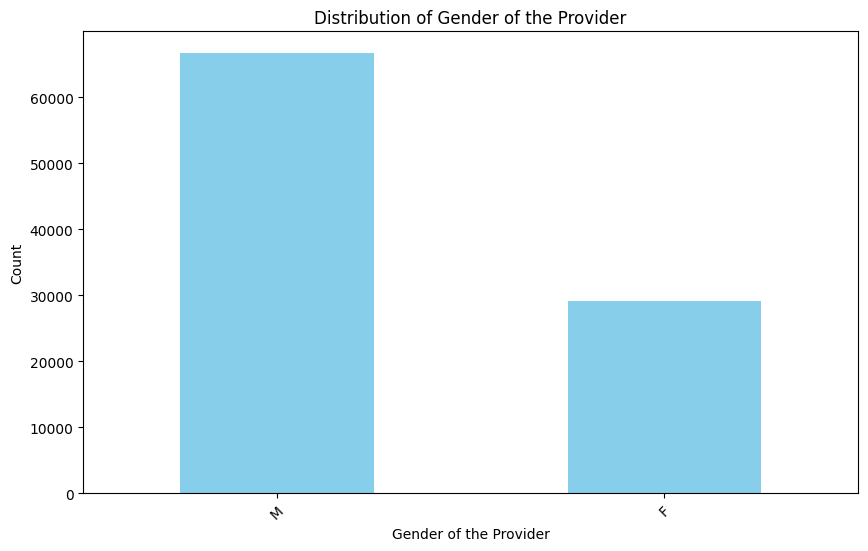

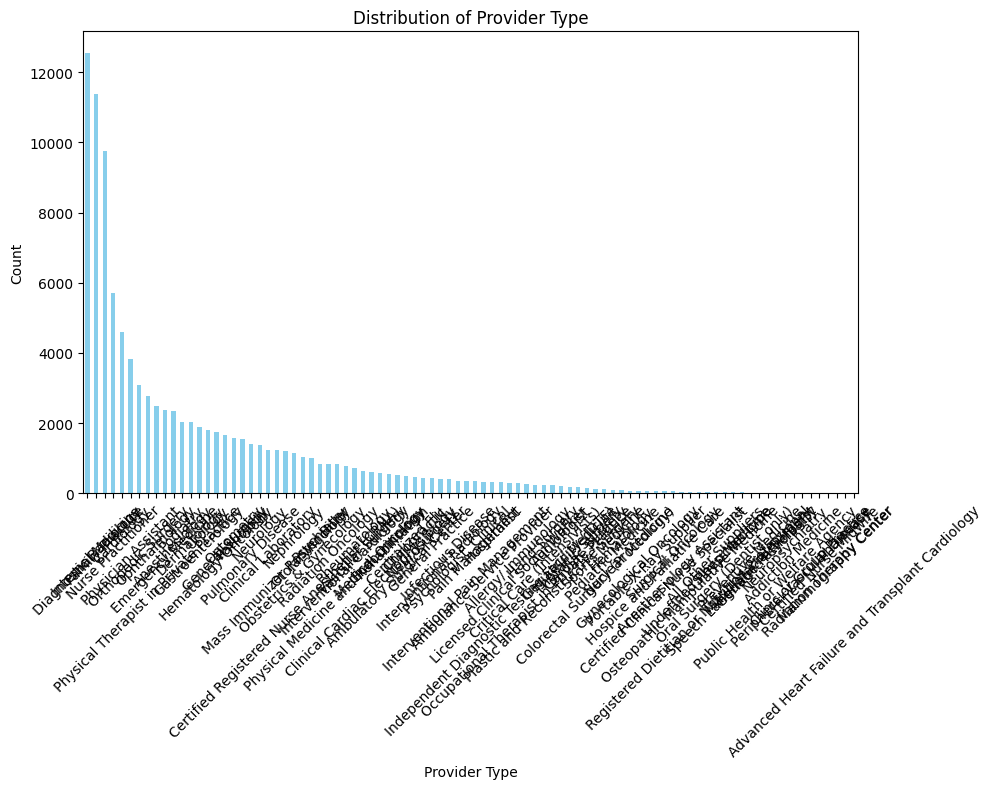

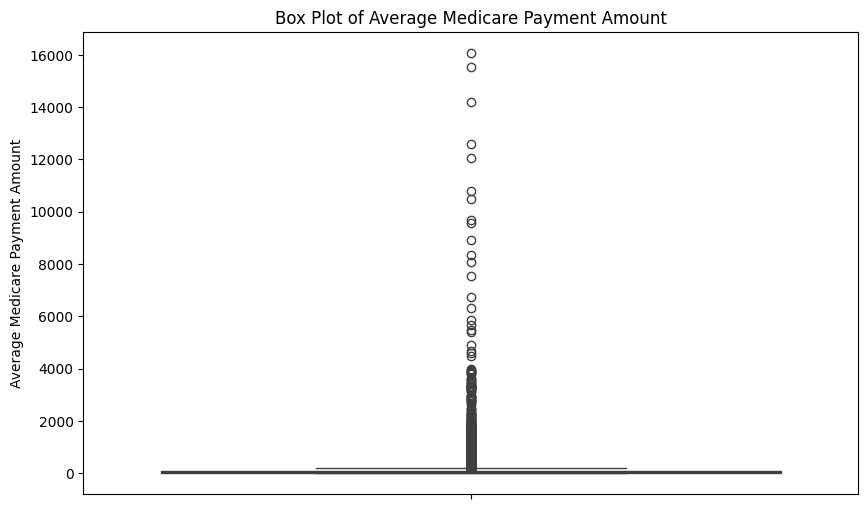

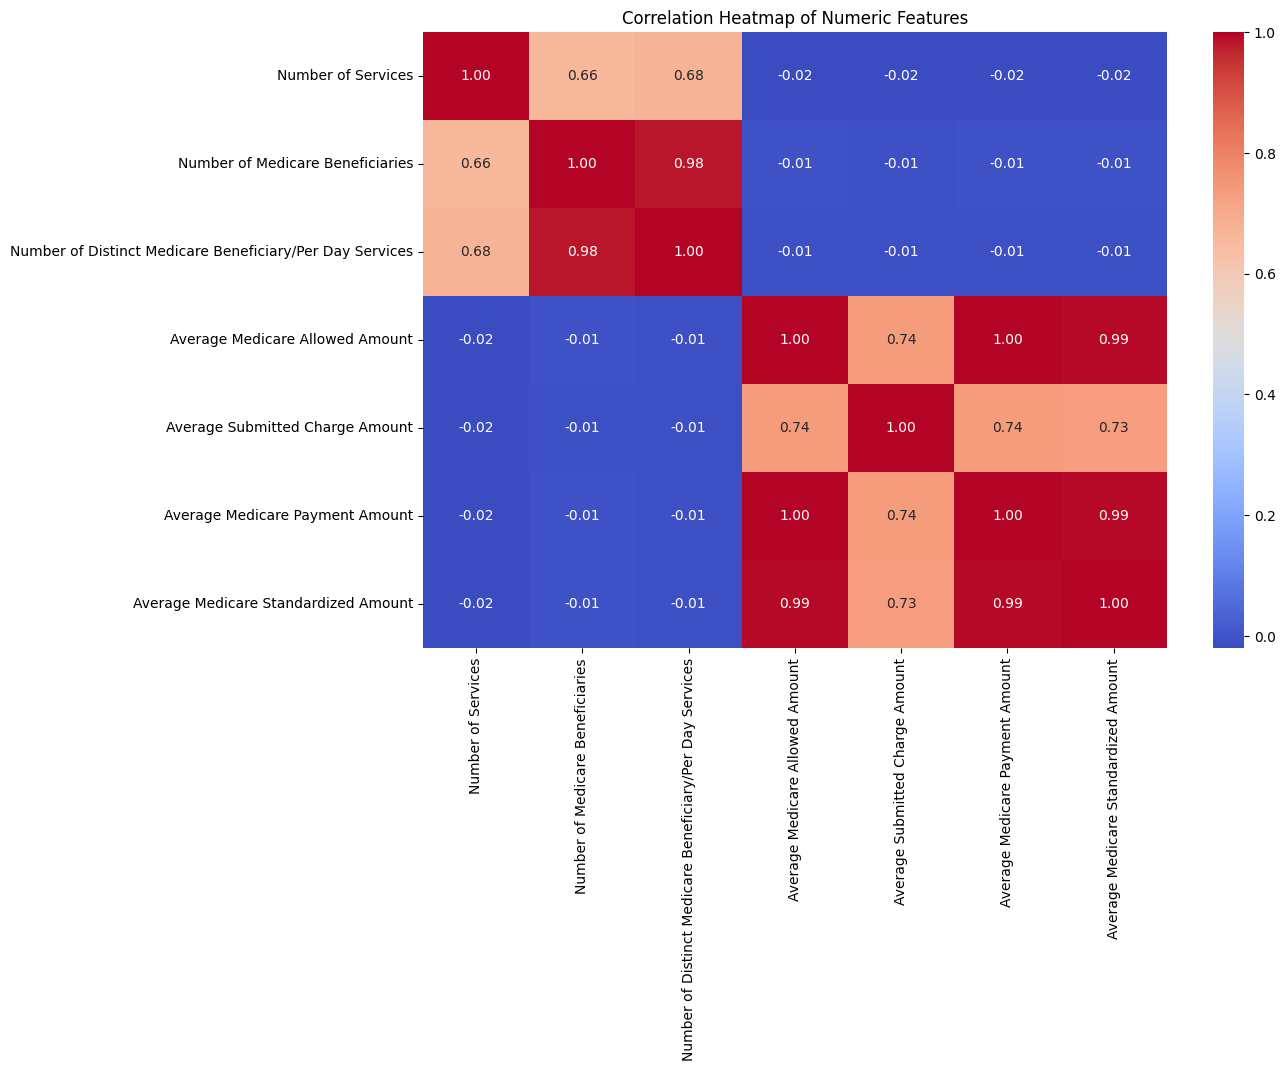

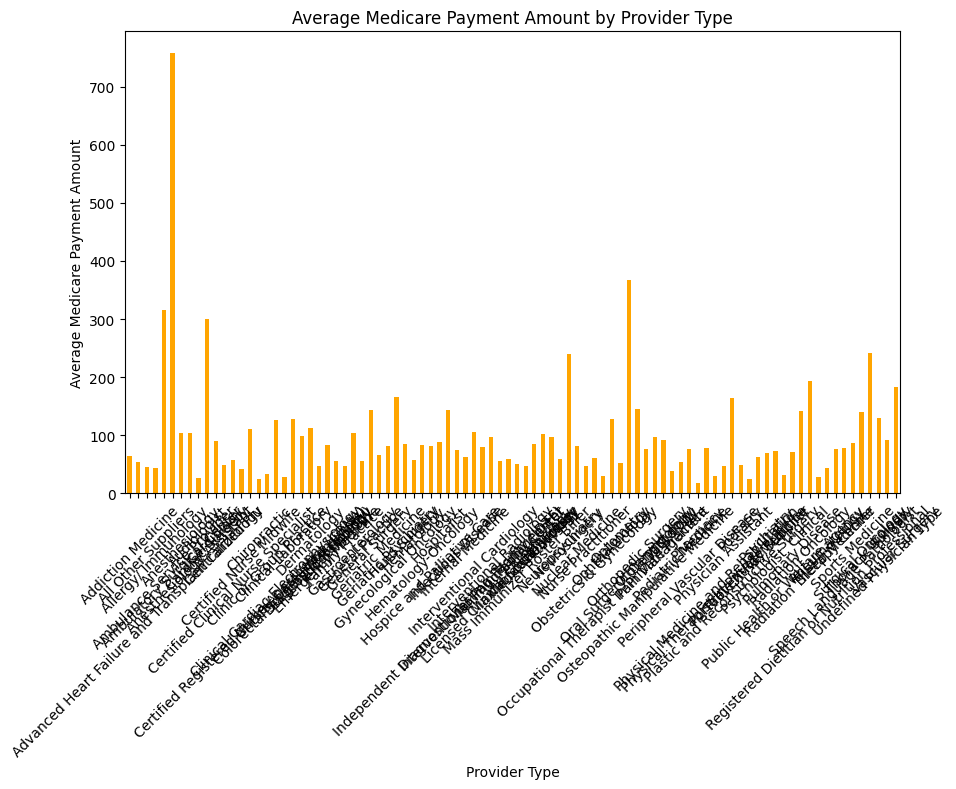

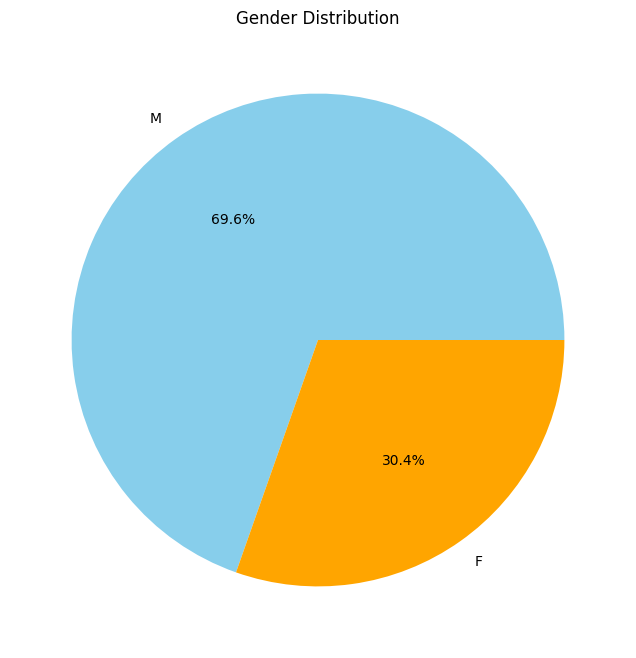

In [ ]:
# Visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_cleaned = pd.read_csv("/Healthcare Providers.csv")

numeric_columns = [
    'Number of Services', 'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
    'Average Medicare Payment Amount', 'Average Medicare Standardized Amount'
]

# Clean numeric columns temporarily by removing commas for plotting purposes
df_cleaned_temp = df_cleaned.copy()
for col in numeric_columns:
    df_cleaned_temp[col] = df_cleaned_temp[col].astype(str).str.replace(',', '').astype(float)

categorical_columns = [
    'Gender of the Provider', 'Provider Type',
]

# Plot bar plots for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    df_cleaned[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Box Plot for Average Medicare Payment Amount
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_cleaned_temp['Average Medicare Payment Amount'])
plt.title('Box Plot of Average Medicare Payment Amount')
plt.ylabel('Average Medicare Payment Amount')
plt.show()

# Heatmap for Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = df_cleaned_temp[numeric_columns].dropna().corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# Bar Plot for Average Medicare Payment Amount by Provider Type
plt.figure(figsize=(10, 6))
df_cleaned_temp.groupby('Provider Type')['Average Medicare Payment Amount'].mean().plot(kind='bar', color='orange')
plt.title('Average Medicare Payment Amount by Provider Type')
plt.xlabel('Provider Type')
plt.ylabel('Average Medicare Payment Amount')
plt.xticks(rotation=45)
plt.show()

# Pie Chart for Gender Distribution
plt.figure(figsize=(8, 8))
df_cleaned['Gender of the Provider'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

Outliers found at indices: [   72   120   122 ... 99914 99927 99932]


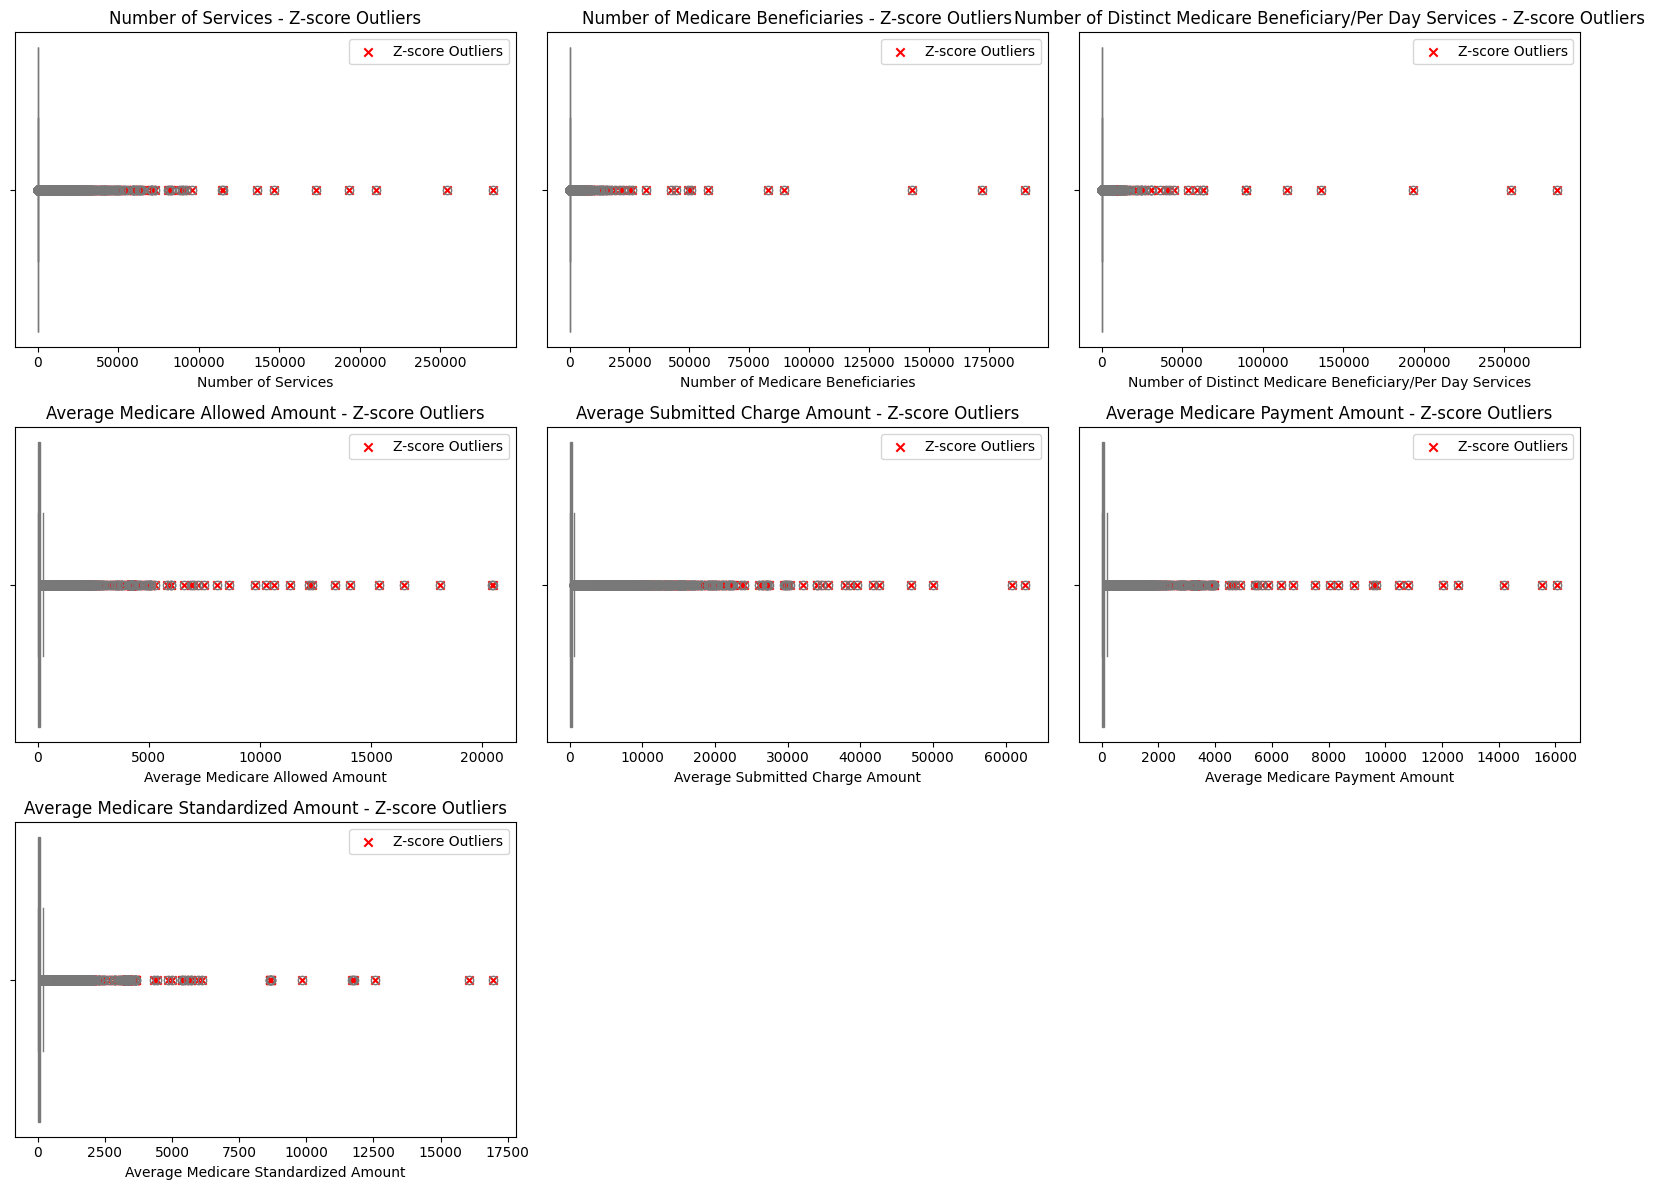

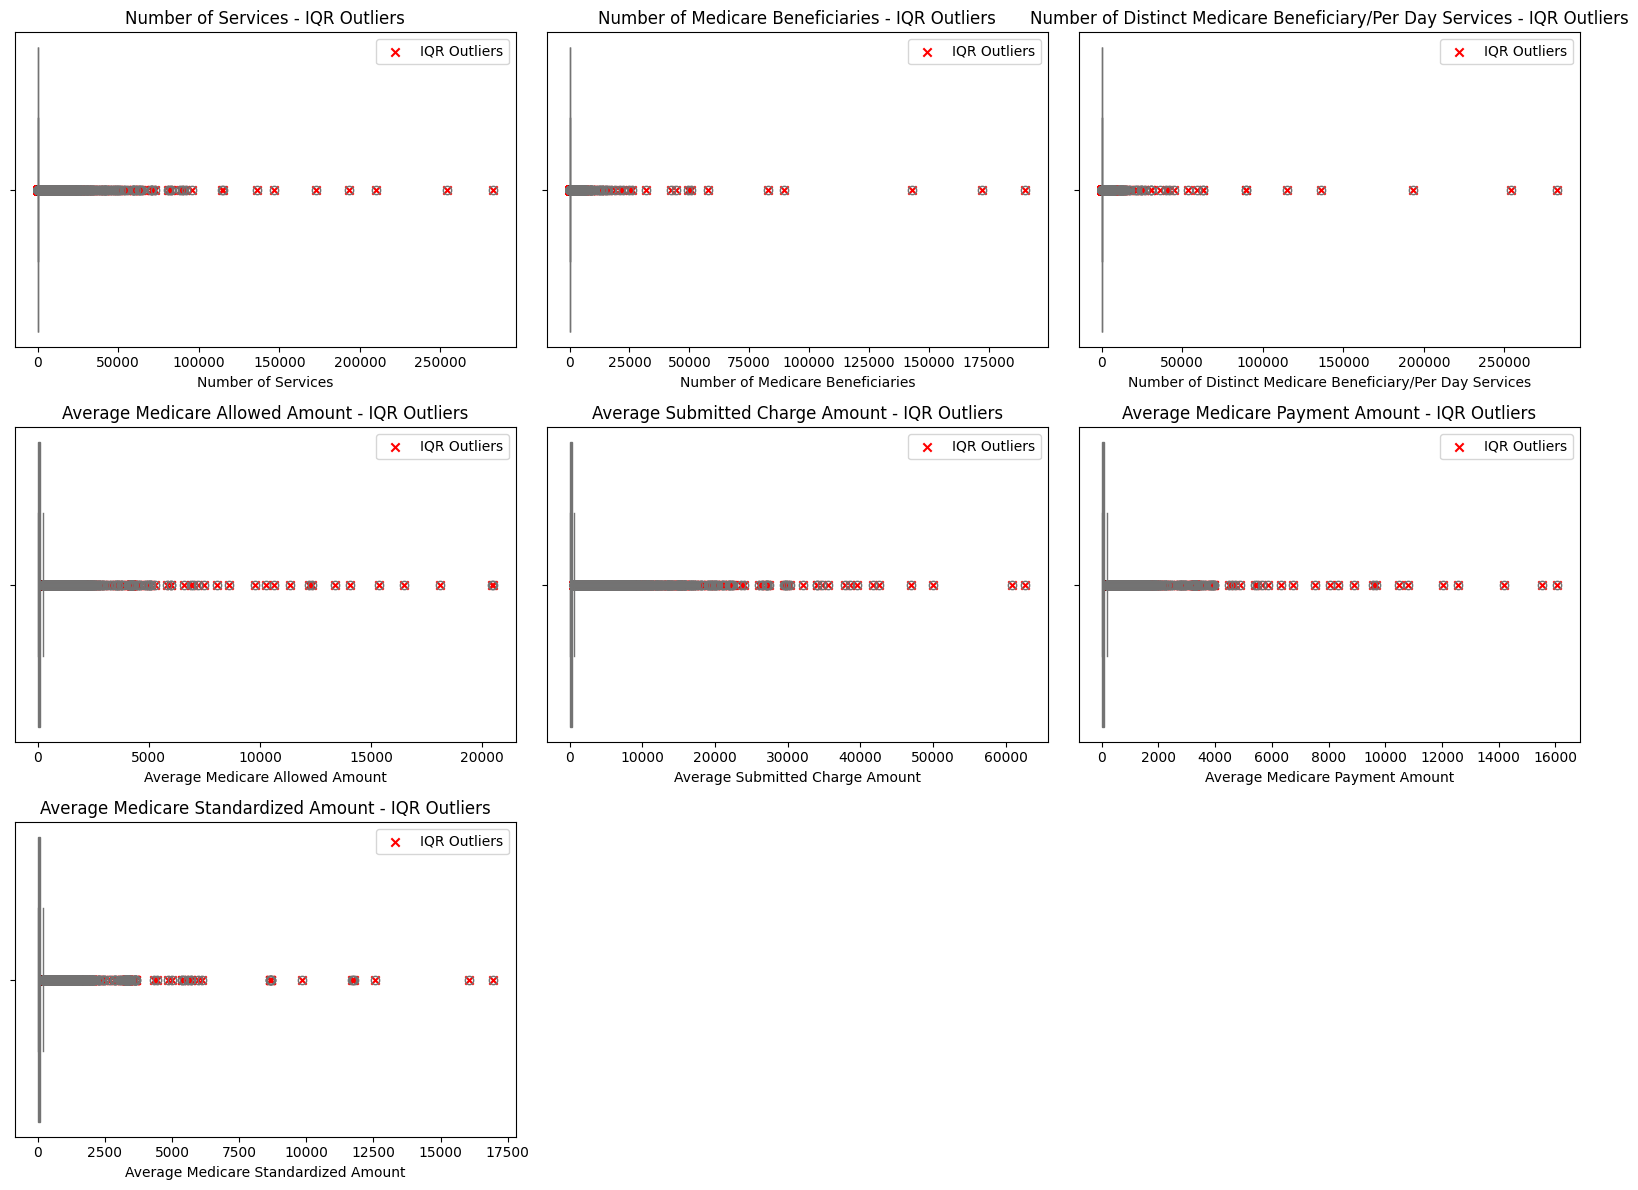

In [ ]:
# Outliers

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load cleaned data
data = pd.read_csv('/cleaned_data.csv')

# Columns for processing
numerical_cols = ['Number of Services', 'Number of Medicare Beneficiaries',
                  'Number of Distinct Medicare Beneficiary/Per Day Services',
                  'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
                  'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']

# Scale numerical columns for outlier detection
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_cols])

# Calculate z-scores
z_scores = np.abs(scaled_data)

# Identify potential outliers
outlier_threshold = 3
outliers = np.where(z_scores > outlier_threshold)
print(f"Outliers found at indices: {np.unique(outliers[0])}")

# Visualize outliers for each column using boxplot and Z-scores
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols, 1):
    z_col = z_scores[:, i-1]  # Get the Z-scores for the current column
    outlier_indices = np.where(z_col > outlier_threshold)[0]  # Indices where Z-score > threshold

    # Plot with outliers marked
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[col], color='lightblue')
    plt.scatter(data.loc[outlier_indices, col], [0] * len(outlier_indices), color='red', marker='x', label='Z-score Outliers')
    plt.title(f'{col} - Z-score Outliers')
    plt.legend()

plt.tight_layout()
plt.show()

# Save the plot to a file
# plt.savefig("outlier_detection_plots.png")

# Detect outliers using IQR method
iqr_outliers = {}
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols, 1):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outlier_indices = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index
    iqr_outliers[col] = outlier_indices

    # Plot with outliers marked
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[col], color='lightgreen')
    plt.scatter(data.loc[outlier_indices, col], [0] * len(outlier_indices), color='red', marker='x', label='IQR Outliers')
    plt.title(f'{col} - IQR Outliers')
    plt.legend()

plt.tight_layout()
plt.show()


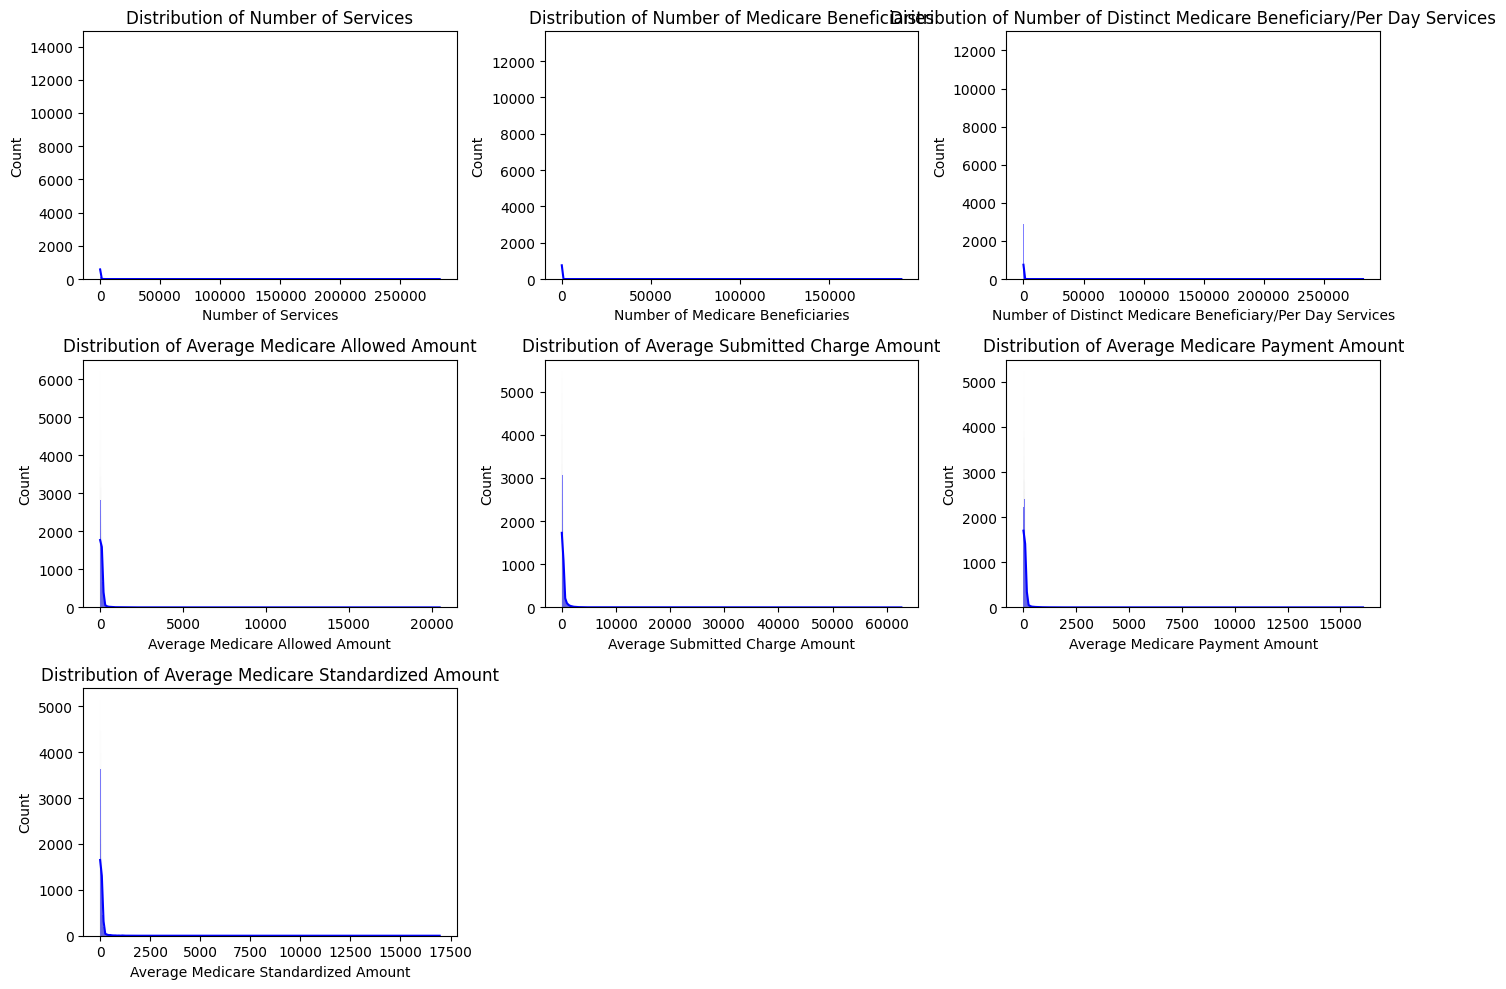

Scaling and encoding completed. Data saved in 'cleaned_data.csv'.


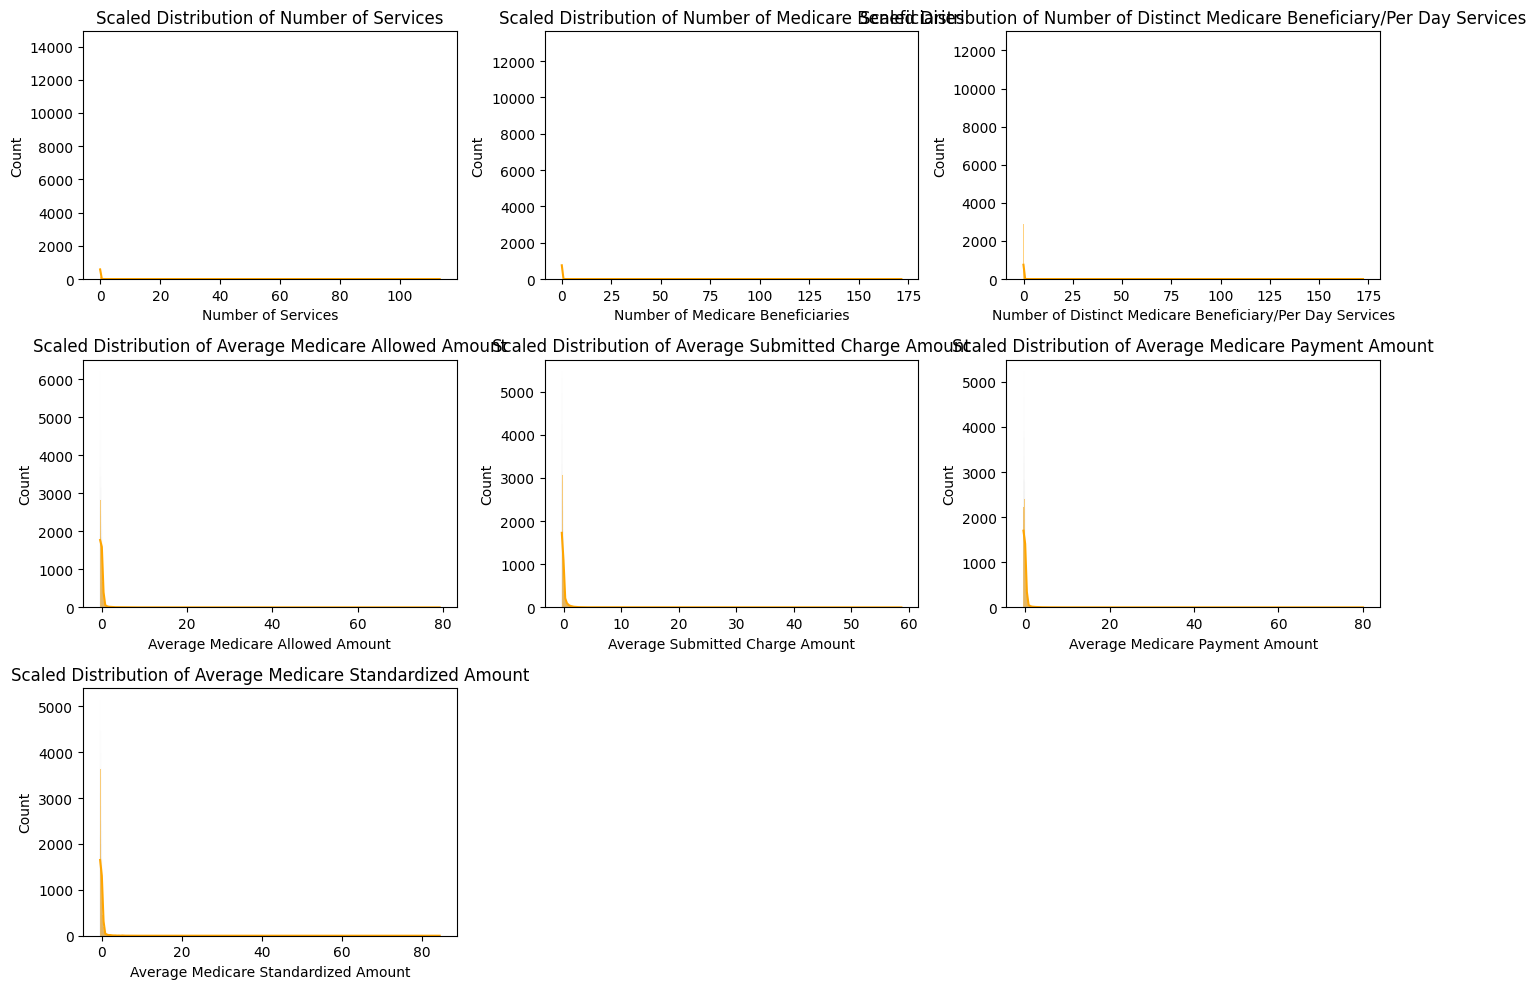

In [ ]:
# Encoding

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned data
data = pd.read_csv('/cleaned_data.csv')

# Columns for processing
numerical_cols = [
    'Number of Services', 'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
    'Average Medicare Payment Amount', 'Average Medicare Standardized Amount'
]

categorical_cols = [
    'Gender of the Provider', 'Entity Type of the Provider', 'HCPCS Drug Indicator',
    'Country Code of the Provider', 'Medicare Participation Indicator', 'Place of Service'
]

# Step 1: Visualize initial distributions of numerical columns before scaling
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_cols, 1):
    if col in data.columns:  # Check if the column exists
        plt.subplot(3, 3, i)
        sns.histplot(data[col], kde=True, color='blue')
        plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Scale numerical data directly in the original DataFrame
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Encode categorical columns directly in the original DataFrame
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Corrected parameter name
encoded_data = encoder.fit_transform(data[categorical_cols])
encoded_columns = encoder.get_feature_names_out(categorical_cols)

# Create a DataFrame of encoded columns
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns, index=data.index)

# Drop original categorical columns and merge encoded columns
data.drop(columns=categorical_cols, inplace=True)
data = pd.concat([data, encoded_df], axis=1)

# Save changes to the same dataset
data.to_csv('/cleaned_data.csv', index=False)
print("Scaling and encoding completed. Data saved in 'cleaned_data.csv'.")

# Step 2: Visualize distributions of numerical columns after scaling
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_cols, 1):
    if col in data.columns:  # Ensure the column exists
        plt.subplot(3, 3, i)
        sns.histplot(data[col], kde=True, color='orange')
        plt.title(f"Scaled Distribution of {col}")
plt.tight_layout()
plt.show()


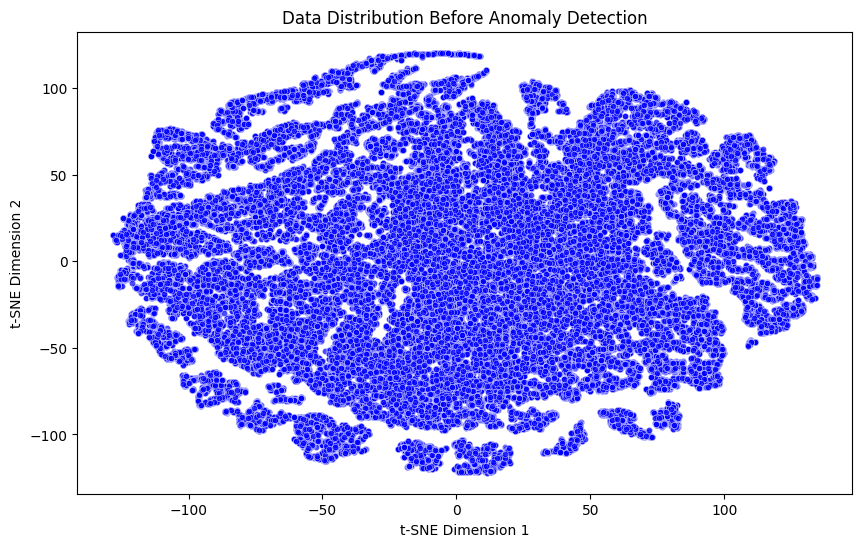

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


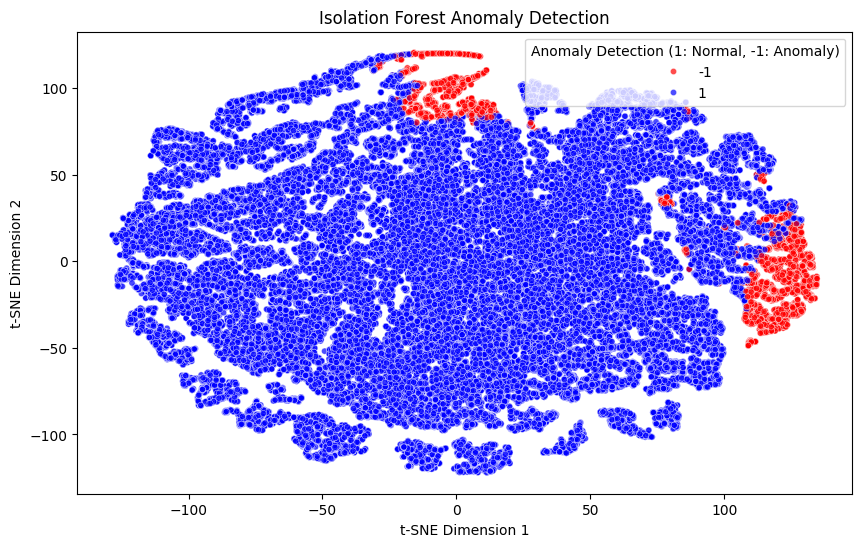

In [ ]:
# Isoaltion forest

from sklearn.ensemble import IsolationForest
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the normalized dataset
file_path = "/cleaned_data.csv" 
df = pd.read_csv(file_path)

# Define the numeric columns for anomaly detection
numeric_columns = [
    'Number of Services', 'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
    'Average Medicare Payment Amount', 'Average Medicare Standardized Amount'
]

# Prepare data for anomaly detection
X = df[numeric_columns].values

# Apply t-SNE for 2D visualization before anomaly detection
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot original data distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], color='blue', s=20, alpha=0.7)
plt.title("Data Distribution Before Anomaly Detection")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

# Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly_IsolationForest'] = iso_forest.fit_predict(X)

# Visualize anomalies detected by Isolation Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['Anomaly_IsolationForest'],
                palette={1: 'blue', -1: 'red'}, s=20, alpha=0.7)
plt.title("Isolation Forest Anomaly Detection")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Anomaly Detection (1: Normal, -1: Anomaly)")
plt.show()



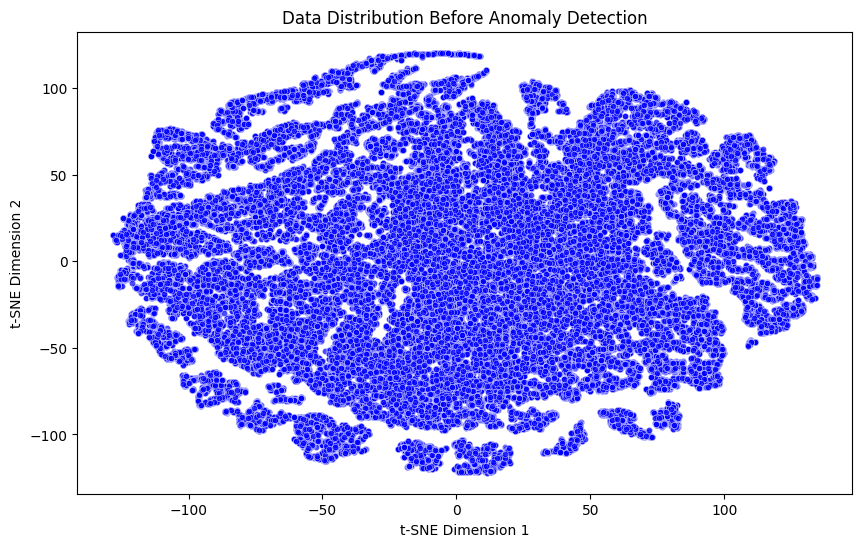

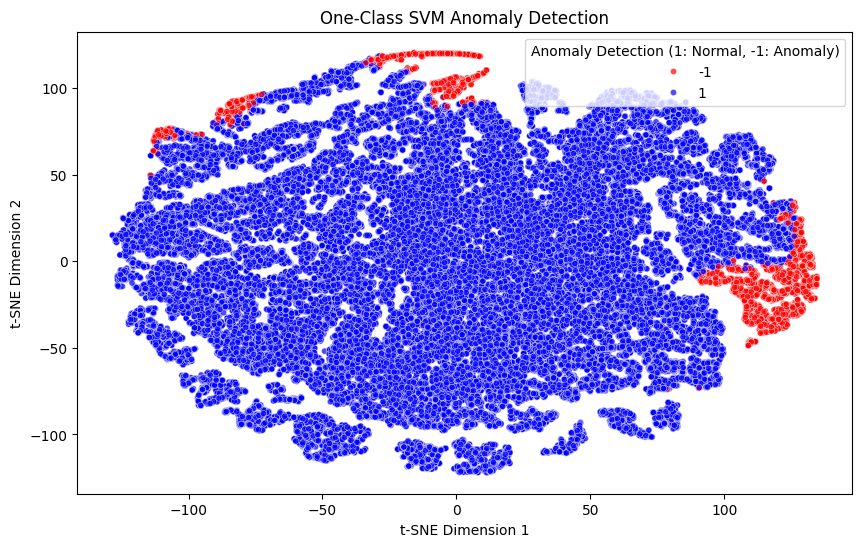

In [ ]:
# One Class SVM

from sklearn.svm import OneClassSVM
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the normalized dataset
file_path = "/cleaned_data.csv" 
df = pd.read_csv(file_path)

# Define the numeric columns for anomaly detection
numeric_columns = [
    'Number of Services', 'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
    'Average Medicare Payment Amount', 'Average Medicare Standardized Amount'
]

# Prepare data for anomaly detection
X = df[numeric_columns].values

# Apply t-SNE for 2D visualization before anomaly detection
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot original data distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], color='blue', s=20, alpha=0.7)
plt.title("Data Distribution Before Anomaly Detection")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

# One-Class SVM model
ocsvm = OneClassSVM(nu=0.05, kernel="rbf", gamma='scale') 
df['Anomaly_OneClassSVM'] = ocsvm.fit_predict(X)

# Visualize anomalies detected by One-Class SVM
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['Anomaly_OneClassSVM'],
                palette={1: 'blue', -1: 'red'}, s=20, alpha=0.7)
plt.title("One-Class SVM Anomaly Detection")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Anomaly Detection (1: Normal, -1: Anomaly)")
plt.show()


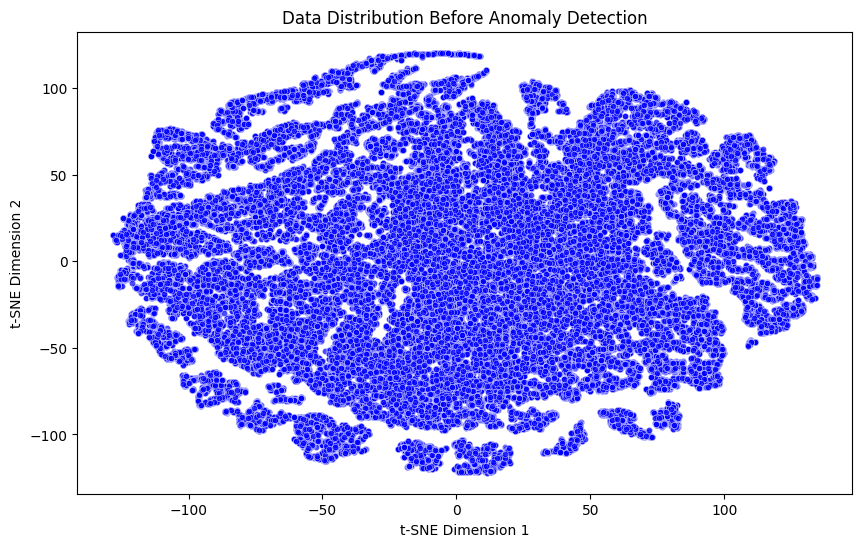

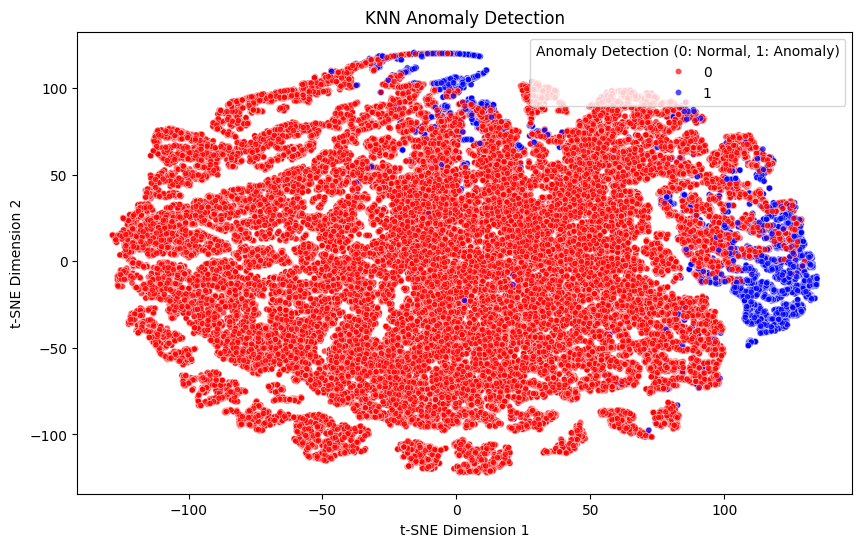

In [ ]:
# KNN

from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the normalized dataset
file_path = "/cleaned_data.csv"
df = pd.read_csv(file_path)

# Define the numeric columns for anomaly detection
numeric_columns = [
    'Number of Services', 'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
    'Average Medicare Payment Amount', 'Average Medicare Standardized Amount'
]

# Prepare data for anomaly detection
X = df[numeric_columns].values

# Apply t-SNE for 2D visualization before anomaly detection
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot original data distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], color='blue', s=20, alpha=0.7)
plt.title("Data Distribution Before Anomaly Detection")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

# K-Nearest Neighbors (KNN) model
knn = NearestNeighbors(n_neighbors=5)
knn.fit(X)
distances, _ = knn.kneighbors(X)
# Compute the mean distance for each point to its neighbors
mean_distances = np.mean(distances, axis=1)
threshold = np.percentile(mean_distances, 95)  # Top 5% as anomalies

# Classify anomalies
df['Anomaly_KNN'] = (mean_distances > threshold).astype(int)

# Visualize anomalies detected by KNN
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['Anomaly_KNN'],
                palette={1: 'blue', 0: 'red'}, s=20, alpha=0.7)
plt.title("KNN Anomaly Detection")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Anomaly Detection (0: Normal, 1: Anomaly)")
plt.show()


In [10]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.1 MB/s eta 0:00:00


[I 2024-11-19 11:08:17,928] A new study created in memory with name: no-name-c89e1860-7a60-44eb-aa79-6fdc18cb0f84


Missing values in dataset:
 Number of Services                                          0
Number of Medicare Beneficiaries                            0
Number of Distinct Medicare Beneficiary/Per Day Services    0
Average Medicare Allowed Amount                             0
Average Submitted Charge Amount                             0
Average Medicare Payment Amount                             0
Average Medicare Standardized Amount                        0
Gender of the Provider_M                                    0
Gender of the Provider_nan                                  0
Entity Type of the Provider_O                               0
HCPCS Drug Indicator_Y                                      0
Country Code of the Provider_JP                             0
Country Code of the Provider_TR                             0
Country Code of the Provider_US                             0
Medicare Participation Indicator_Y                          0
Place of Service_O                        

[I 2024-11-19 11:08:21,173] Trial 0 finished with value: 0.930975 and parameters: {'n_estimators': 79, 'max_samples': 0.5474409167762996, 'contamination': 0.06902371701638414, 'max_features': 0.6072011785402005}. Best is trial 0 with value: 0.930975.
[I 2024-11-19 11:08:27,316] Trial 1 finished with value: 0.8742375 and parameters: {'n_estimators': 139, 'max_samples': 0.6708557422256036, 'contamination': 0.1257551157355432, 'max_features': 0.7542749004813794}. Best is trial 0 with value: 0.930975.
[I 2024-11-19 11:08:36,963] Trial 2 finished with value: 0.9132125 and parameters: {'n_estimators': 153, 'max_samples': 0.9238832642734727, 'contamination': 0.08678782202908607, 'max_features': 0.86780408632038}. Best is trial 0 with value: 0.930975.
[I 2024-11-19 11:08:43,904] Trial 3 finished with value: 0.8180375 and parameters: {'n_estimators': 140, 'max_samples': 0.5893734106866932, 'contamination': 0.18196172671355132, 'max_features': 0.9065475875868214}. Best is trial 0 with value: 0.9

Best parameters from Optuna: {'n_estimators': 117, 'max_samples': 0.7018902517819949, 'contamination': 0.05115619554320578, 'max_features': 0.9927315992725382}
Test Metrics - Accuracy: 0.9508, Precision: 1.0000, Recall: 0.9508, F1-Score: 0.9748


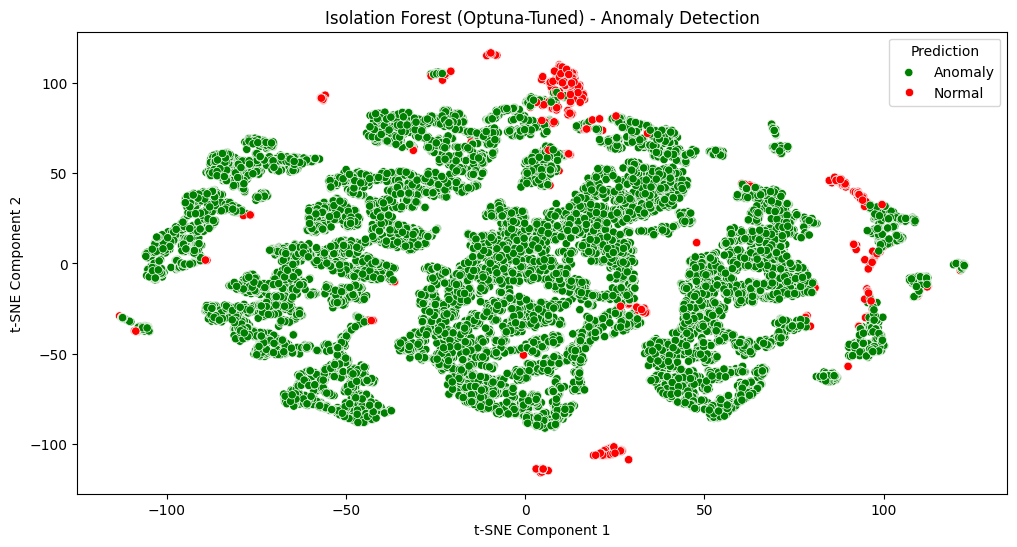

In [ ]:
# Hyperparameter Tuning

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import optuna
import seaborn as sns
import matplotlib.pyplot as plt

# Load the processed data
file_path = "/cleaned_data.csv"
df = pd.read_csv(file_path)

# Check and handle missing values in the dataset
print("Missing values in dataset:\n", df.isnull().sum())
imputer = SimpleImputer(strategy="mean")
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split dataset into train and test sets
X_train, X_test = train_test_split(df.values, test_size=0.2, random_state=42)

# Optuna optimization function
def iso_forest_objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 200)
    max_samples = trial.suggest_float("max_samples", 0.5, 1.0)
    contamination = trial.suggest_float("contamination", 0.05, 0.2)
    max_features = trial.suggest_float("max_features", 0.5, 1.0)

    # Create Isolation Forest model
    model = IsolationForest(
        n_estimators=n_estimators,
        max_samples=max_samples,
        contamination=contamination,
        max_features=max_features,
        random_state=42
    )
    model.fit(X_train)

    predictions = model.predict(X_train)
    predictions_binary = np.where(predictions == 1, 1, 0)
    return accuracy_score(np.ones_like(predictions_binary), predictions_binary)

# Run Optuna
optuna_study = optuna.create_study(direction="maximize")
optuna_study.optimize(iso_forest_objective, n_trials=20)
best_params = optuna_study.best_params

print("Best parameters from Optuna:", best_params)

# Train the Isolation Forest with optimal parameters
best_model = IsolationForest(**best_params, random_state=42)
best_model.fit(X_train)

# Test predictions
test_predictions = best_model.predict(X_test)
test_predictions_binary = np.where(test_predictions == 1, 1, 0)

# Evaluate metrics
accuracy = accuracy_score(np.ones_like(test_predictions_binary), test_predictions_binary)
precision = precision_score(np.ones_like(test_predictions_binary), test_predictions_binary)
recall = recall_score(np.ones_like(test_predictions_binary), test_predictions_binary)
f1 = f1_score(np.ones_like(test_predictions_binary), test_predictions_binary)

print(f"Test Metrics - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
X_test_tsne = tsne.fit_transform(X_test)

plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=X_test_tsne[:, 0],
    y=X_test_tsne[:, 1],
    hue=test_predictions_binary,
    palette={0: "red", 1: "green"},
    legend="full"
)
plt.title("Isolation Forest (Optuna-Tuned) - Anomaly Detection")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Prediction", labels=["Anomaly", "Normal"])
plt.show()

[I 2024-11-19 14:25:26,215] A new study created in memory with name: no-name-99a496de-4b1a-4a66-bb98-f2c733393237
[I 2024-11-19 14:34:28,462] Trial 0 finished with value: 1.0 and parameters: {'nu': 0.36225630563136724, 'gamma': 'auto'}. Best is trial 0 with value: 1.0.
[I 2024-11-19 14:43:34,499] Trial 1 finished with value: 1.0 and parameters: {'nu': 0.3669108150254559, 'gamma': 'scale'}. Best is trial 0 with value: 1.0.
[I 2024-11-19 14:51:45,967] Trial 2 finished with value: 1.0 and parameters: {'nu': 0.32639317811601526, 'gamma': 'scale'}. Best is trial 0 with value: 1.0.
[I 2024-11-19 14:55:15,425] Trial 3 finished with value: 1.0 and parameters: {'nu': 0.1287411552604247, 'gamma': 'scale'}. Best is trial 0 with value: 1.0.
[I 2024-11-19 15:05:47,064] Trial 4 finished with value: 1.0 and parameters: {'nu': 0.41023468454748646, 'gamma': 'auto'}. Best is trial 0 with value: 1.0.
[I 2024-11-19 15:08:31,732] Trial 5 finished with value: 1.0 and parameters: {'nu': 0.1431827535210775, '

Test Accuracy (One-Class SVM, Optuna): 1.0


[I 2024-11-19 16:57:52,188] Trial 0 finished with value: 1.0 and parameters: {'n_neighbors': 7}. Best is trial 0 with value: 1.0.
[I 2024-11-19 16:57:56,587] Trial 1 finished with value: 1.0 and parameters: {'n_neighbors': 7}. Best is trial 0 with value: 1.0.
[I 2024-11-19 16:58:01,711] Trial 2 finished with value: 1.0 and parameters: {'n_neighbors': 16}. Best is trial 0 with value: 1.0.
[I 2024-11-19 16:58:08,879] Trial 3 finished with value: 1.0 and parameters: {'n_neighbors': 19}. Best is trial 0 with value: 1.0.
[I 2024-11-19 16:58:13,383] Trial 4 finished with value: 1.0 and parameters: {'n_neighbors': 11}. Best is trial 0 with value: 1.0.
[I 2024-11-19 16:58:17,057] Trial 5 finished with value: 1.0 and parameters: {'n_neighbors': 7}. Best is trial 0 with value: 1.0.
[I 2024-11-19 16:58:22,849] Trial 6 finished with value: 1.0 and parameters: {'n_neighbors': 9}. Best is trial 0 with value: 1.0.
[I 2024-11-19 16:58:27,754] Trial 7 finished with value: 1.0 and parameters: {'n_neighb

Test Accuracy (KNN, Optuna): 1.0


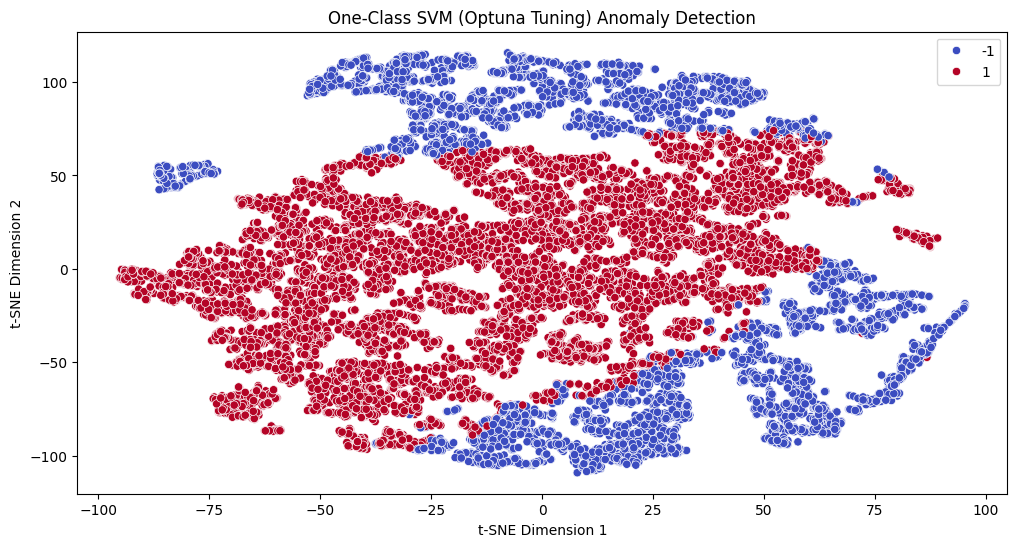

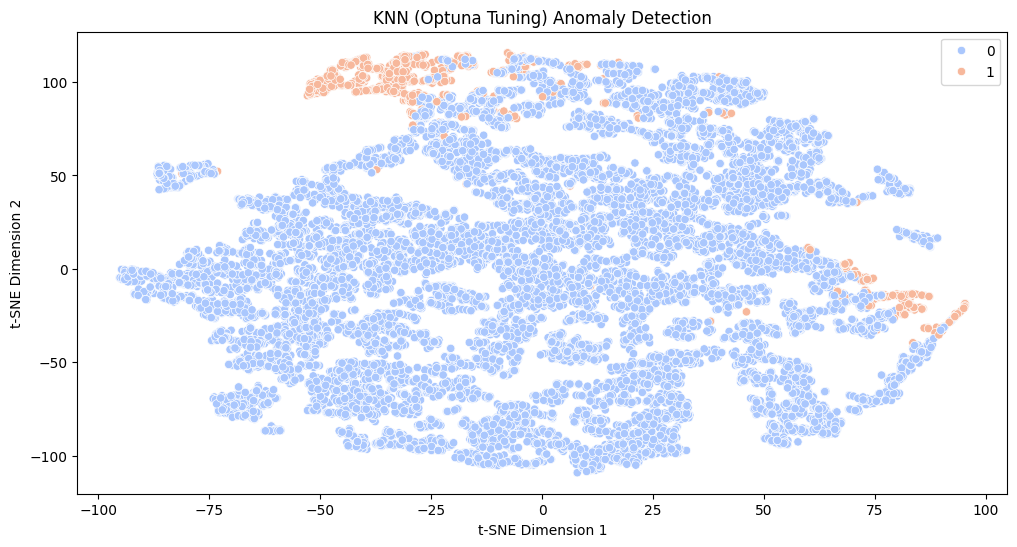

In [ ]:
# Hyperparameter Tuning

import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score
import optuna
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = "/cleaned_data.csv" 
df = pd.read_csv(file_path)

# Split dataset
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Define numeric columns for anomaly detection
numeric_columns = [
    'Number of Services', 'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
    'Average Medicare Payment Amount', 'Average Medicare Standardized Amount'
]
X_train = train_df[numeric_columns].values
X_test = test_df[numeric_columns].values


# Optuna for One-Class SVM
def oneclass_svm_objective(trial):
    nu = trial.suggest_float("nu", 0.01, 0.5)
    gamma = trial.suggest_categorical("gamma", ["scale", "auto"])

    model = OneClassSVM(nu=nu, gamma=gamma)
    predictions = model.fit_predict(X_train)

    # Using accuracy score placeholder, adjust if labels are available
    return accuracy_score(predictions, predictions)

# Run Optuna optimization for One-Class SVM
optuna_svm_study = optuna.create_study(direction="maximize")
optuna_svm_study.optimize(oneclass_svm_objective, n_trials=20)
best_svm_optuna = OneClassSVM(**optuna_svm_study.best_params)

# Testing and visualization with Optuna-tuned One-Class SVM model
test_predictions_svm = best_svm_optuna.fit_predict(X_test)
accuracy_svm = accuracy_score(test_predictions_svm, test_predictions_svm)
print("Test Accuracy (One-Class SVM, Optuna):", accuracy_svm)


# Optuna for KNN (Distance-based Anomaly Detection)
def knn_objective(trial):
    n_neighbors = trial.suggest_int("n_neighbors", 1, 20)
    knn = NearestNeighbors(n_neighbors=n_neighbors)
    knn.fit(X_train)

    # Calculate the distances to the n_neighbors-th neighbor
    distances, _ = knn.kneighbors(X_train)

    # Set threshold based on 95th percentile of distances
    threshold = np.percentile(distances[:, -1], 95)
    predictions = (distances[:, -1] > threshold).astype(int)

    # Using accuracy score placeholder, adjust if labels are available
    return accuracy_score(predictions, predictions)

# Run Optuna optimization for KNN
optuna_knn_study = optuna.create_study(direction="maximize")
optuna_knn_study.optimize(knn_objective, n_trials=20)
best_n_neighbors = optuna_knn_study.best_params['n_neighbors']

# Applying KNN with the best number of neighbors
knn_optuna = NearestNeighbors(n_neighbors=best_n_neighbors)
knn_optuna.fit(X_test)
distances, _ = knn_optuna.kneighbors(X_test)

# Set a threshold for anomalies based on the 95th percentile of distances
threshold_knn = np.percentile(distances[:, -1], 95)
test_predictions_knn = (distances[:, -1] > threshold_knn).astype(int)

accuracy_knn = accuracy_score(test_predictions_knn, test_predictions_knn)
print("Test Accuracy (KNN, Optuna):", accuracy_knn)


# Visualization with t-SNE
# Apply t-SNE to reduce dimensions for visualization
tsne = TSNE(n_components=2, random_state=42)
X_test_tsne = tsne.fit_transform(X_test)

# Plotting One-Class SVM predictions after Optuna tuning
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_test_tsne[:, 0], y=X_test_tsne[:, 1], hue=test_predictions_svm, palette="coolwarm", legend="full")
plt.title("One-Class SVM (Optuna Tuning) Anomaly Detection")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

# Plotting KNN predictions after Optuna tuning
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_test_tsne[:, 0], y=X_test_tsne[:, 1], hue=test_predictions_knn, palette="coolwarm", legend="full")
plt.title("KNN (Optuna Tuning) Anomaly Detection")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

Epoch 1/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.4035 - val_loss: 0.1800
Epoch 2/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.3798 - val_loss: 0.1800
Epoch 3/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.4611 - val_loss: 0.1798
Epoch 4/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.3585 - val_loss: 0.1797
Epoch 5/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.3889 - val_loss: 0.1726
Epoch 6/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.3891 - val_loss: 0.1726
Epoch 7/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.4173 - val_loss: 0.1727
Epoch 8/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.4401 - val_loss: 0.1726
Epoch 9/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.4006 - val_loss: 0.1724
Epoch 10/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.2932 - val_loss: 0.1725
Epoch 11/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.3563 - val_loss: 0.1724
Epoch 12/20
2250/2250 ━━

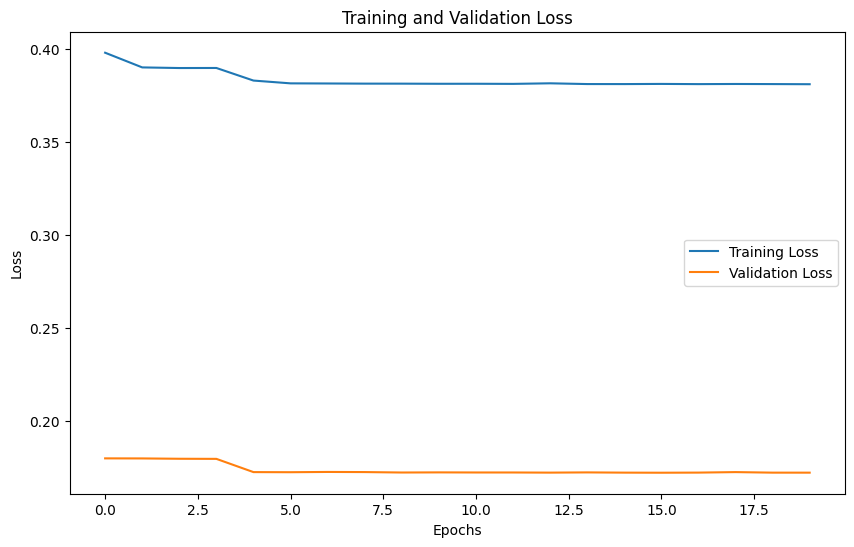

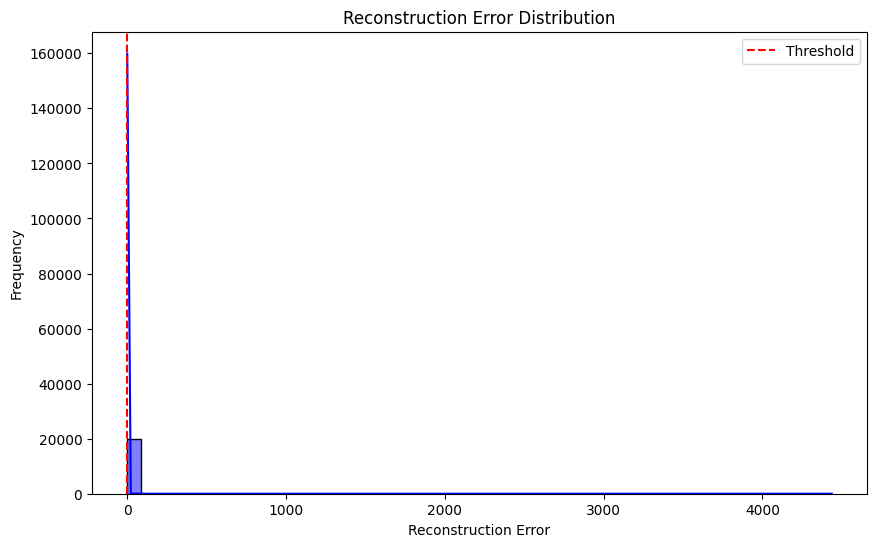

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


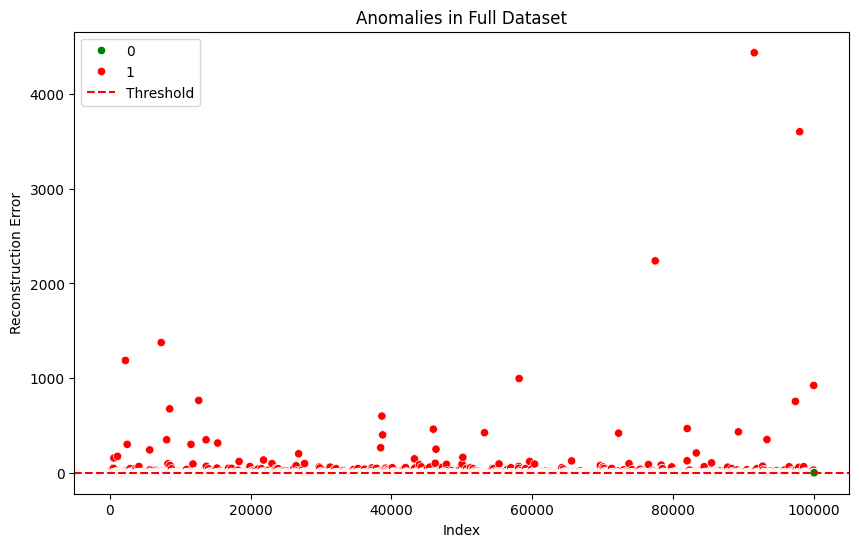

In [ ]:
# Autoencoders

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Load processed data from CSV
processed_data = pd.read_csv('/cleaned_data.csv').values  # .values converts DataFrame to numpy array

# Split data into training and testing sets
X_train, X_test = train_test_split(processed_data, test_size=0.2, random_state=42)

# Build
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
bottleneck = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(bottleneck)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the autoencoder
history = autoencoder.fit(
    X_train, X_train,
    epochs=20, batch_size=32,
    validation_split=0.1,
    verbose=1
)

# Evaluate 
reconstructed_test = autoencoder.predict(X_test)
test_errors = np.mean(np.power(X_test - reconstructed_test, 2), axis=1)

# Set threshold for anomaly detection
threshold = np.percentile(test_errors, 95)

# Classify anomalies
y_test_pred = (test_errors > threshold).astype(int)

# Simulated ground truth (adjust as needed)
y_test_actual = np.random.choice([0, 1], size=len(y_test_pred), p=[0.9, 0.1])

# Calculate metrics
accuracy = accuracy_score(y_test_actual, y_test_pred)
precision = precision_score(y_test_actual, y_test_pred)
recall = recall_score(y_test_actual, y_test_pred)
f1 = f1_score(y_test_actual, y_test_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_actual, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)



# 1. Plot training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 2. Plot reconstruction error distribution
plt.figure(figsize=(10, 6))
sns.histplot(test_errors, kde=True, color='blue', bins=50)
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold')
plt.title('Reconstruction Error Distribution')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 3. Plot anomalies in the full dataset (train and test)
# Calculate errors for the entire dataset
reconstructed_data = autoencoder.predict(processed_data)
full_data_errors = np.mean(np.power(processed_data - reconstructed_data, 2), axis=1)

# Classify anomalies
y_full_pred = (full_data_errors > threshold).astype(int)

# Plot anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(x=np.arange(len(full_data_errors)), y=full_data_errors, hue=y_full_pred, palette={0: 'green', 1: 'red'})
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
plt.title('Anomalies in Full Dataset')
plt.xlabel('Index')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.show()
